In [31]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [2]:
cifar10 = keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape) 

# Normalize: 0,255 -> 0,1
X_train, X_test = X_train / 255.0, X_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(50000, 32, 32, 3)


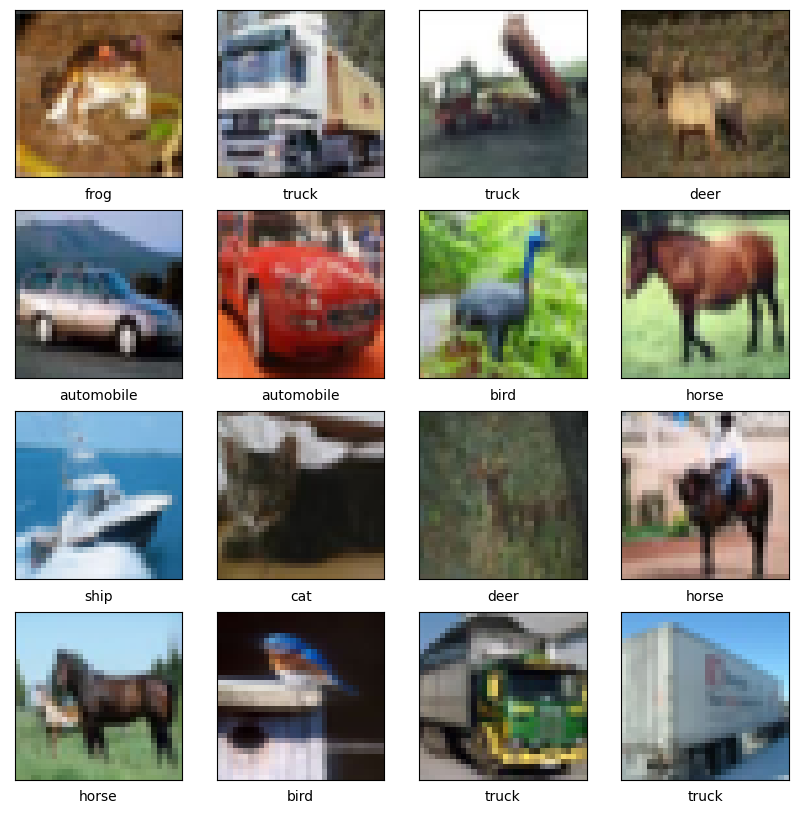

In [3]:
def show():
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
       
        plt.xlabel(class_names[y_train[i][0]])
    plt.show()

show()


### Model implementation

In [77]:
def cnn_model() : 
    # model Creation
    model = keras.models.Sequential()
    # convolutional filter added with size 3
    model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(32,32,3)))
    # max pool with size 2
    model.add(layers.MaxPool2D((2,2)))
     # convolutional filter added with size 3
    model.add(layers.Conv2D(32, 3, activation='relu'))
     # max pool with size 2
    model.add(layers.MaxPool2D((2,2)))
    # make single column tensor
    model.add(layers.Flatten())
    # add fully connected layer to network
    model.add(layers.Dense(32, activation='relu'))
    # add 10 nurons fully connected layers
    model.add(layers.Dense(10))
    print(model.summary())
    return(model)

### Same structure with batch normalize layer

In [75]:
def cnn_model_batch() : 
    model = keras.models.Sequential()
    model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(32,32,3)))
    # add 1batch normalize layer
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(32, 3, activation='relu'))
    # add 1batch normalize layer
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Flatten())    
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10))
    print(model.summary())
    return(model)

### Define comparison optimizers

In [56]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer_Adagrad = keras.optimizers.Adagrad()
optimizer_Adadelta = keras.optimizers.Adadelta()
optimizer_Adam = keras.optimizers.Adam()
optimizer_RMSprop = keras.optimizers.RMSprop()
metrics = ["accuracy"]
batch_size = 64
epochs = 20

### Each Model fit with batch size=64 and 20 epocs

### Batch Normalize Models

In [59]:
model1 = cnn_model_batch()
model1.compile(loss=loss,
              optimizer=optimizer_Adagrad,
              metrics=metrics 
)
name="optimizer_Adagrad_withBN.h5"
earlyStopCallBack = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=2, patience=5)
mc = ModelCheckpoint(name, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_16 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_17 (Bat  (None, 13, 13, 32)       128       
 chNormalization)                                                
                                                     

In [60]:
history1 = model1.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     callbacks=[mc],
                     verbose=1)

Epoch 1/20
781/782 [============================>.] - ETA: 0s - loss: 1.9714 - accuracy: 0.3114
Epoch 1: val_accuracy improved from -inf to 0.37780, saving model to optimizer_Adagrad_withBN.h5
782/782 [==============================] - 50s 62ms/step - loss: 1.9714 - accuracy: 0.3113 - val_loss: 1.7712 - val_accuracy: 0.3778
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 1.6999 - accuracy: 0.4023
Epoch 2: val_accuracy improved from 0.37780 to 0.41400, saving model to optimizer_Adagrad_withBN.h5
782/782 [==============================] - 40s 51ms/step - loss: 1.6999 - accuracy: 0.4023 - val_loss: 1.6553 - val_accuracy: 0.4140
Epoch 3/20
781/782 [============================>.] - ETA: 0s - loss: 1.6062 - accuracy: 0.4352
Epoch 3: val_accuracy improved from 0.41400 to 0.43740, saving model to optimizer_Adagrad_withBN.h5
782/782 [==============================] - 43s 55ms/step - loss: 1.6061 - accuracy: 0.4352 - val_loss: 1.5833 - val_accuracy: 0.4374
Epoch 4/20
782/7

In [61]:
model2 = cnn_model_batch()
model2.compile(loss=loss,
              optimizer=optimizer_Adadelta,
              metrics=metrics 
)
name="optimizer_optimizer_Adadelta_withBN.h5"
earlyStopCallBack = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=2, patience=5)
mc = ModelCheckpoint(name, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_18 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_19 (Bat  (None, 13, 13, 32)       128       
 chNormalization)                                                
                                                     

In [62]:
history2 = model2.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     callbacks=[mc],
                     verbose=1)

Epoch 1/20
781/782 [============================>.] - ETA: 0s - loss: 2.9033 - accuracy: 0.1210
Epoch 1: val_accuracy improved from -inf to 0.13480, saving model to optimizer_optimizer_Adadelta_withBN.h5
782/782 [==============================] - 47s 58ms/step - loss: 2.9030 - accuracy: 0.1211 - val_loss: 2.7030 - val_accuracy: 0.1348
Epoch 2/20
781/782 [============================>.] - ETA: 0s - loss: 2.6714 - accuracy: 0.1403
Epoch 2: val_accuracy improved from 0.13480 to 0.14930, saving model to optimizer_optimizer_Adadelta_withBN.h5
782/782 [==============================] - 42s 54ms/step - loss: 2.6714 - accuracy: 0.1403 - val_loss: 2.5760 - val_accuracy: 0.1493
Epoch 3/20
781/782 [============================>.] - ETA: 0s - loss: 2.5310 - accuracy: 0.1556
Epoch 3: val_accuracy improved from 0.14930 to 0.16820, saving model to optimizer_optimizer_Adadelta_withBN.h5
782/782 [==============================] - 40s 52ms/step - loss: 2.5310 - accuracy: 0.1556 - val_loss: 2.4688 - val_

In [63]:
model3 = cnn_model_batch()
model3.compile(loss=loss,
              optimizer=optimizer_Adam,
              metrics=metrics 
)
name="optimizer_optimizer_Adam_withBN.h5"
earlyStopCallBack = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=2, patience=5)
mc = ModelCheckpoint(name, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_20 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_21 (Bat  (None, 13, 13, 32)       128       
 chNormalization)                                                
                                                     

In [64]:
history3 = model3.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     callbacks=[earlyStopCallBack,mc],
                     verbose=1)

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 1.3955 - accuracy: 0.5058
Epoch 1: val_accuracy improved from -inf to 0.56550, saving model to optimizer_optimizer_Adam_withBN.h5
782/782 [==============================] - 44s 55ms/step - loss: 1.3955 - accuracy: 0.5058 - val_loss: 1.2430 - val_accuracy: 0.5655
Epoch 2/20
781/782 [============================>.] - ETA: 0s - loss: 1.0427 - accuracy: 0.6345
Epoch 2: val_accuracy improved from 0.56550 to 0.58090, saving model to optimizer_optimizer_Adam_withBN.h5
782/782 [==============================] - 46s 59ms/step - loss: 1.0426 - accuracy: 0.6345 - val_loss: 1.2107 - val_accuracy: 0.5809
Epoch 3/20
782/782 [==============================] - ETA: 0s - loss: 0.9185 - accuracy: 0.6757
Epoch 3: val_accuracy improved from 0.58090 to 0.65820, saving model to optimizer_optimizer_Adam_withBN.h5
782/782 [==============================] - 41s 52ms/step - loss: 0.9185 - accuracy: 0.6757 - val_loss: 0.9807 - val_accuracy: 0.

In [65]:
model4 = cnn_model_batch()
model4.compile(loss=loss,
              optimizer=optimizer_Adamax,
              metrics=metrics 
)
name="optimizer_optimizer_Adamax_withBN.h5"
earlyStopCallBack = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=2, patience=5)
mc = ModelCheckpoint(name, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_22 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_23 (Bat  (None, 13, 13, 32)       128       
 chNormalization)                                                
                                                     

In [67]:
history4 = model4.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     callbacks=[mc],
                     verbose=1)

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 1.5622 - accuracy: 0.4455
Epoch 1: val_accuracy improved from -inf to 0.49040, saving model to optimizer_optimizer_Adamax_withBN.h5
782/782 [==============================] - 44s 55ms/step - loss: 1.5622 - accuracy: 0.4455 - val_loss: 1.4183 - val_accuracy: 0.4904
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 1.2043 - accuracy: 0.5771
Epoch 2: val_accuracy improved from 0.49040 to 0.54040, saving model to optimizer_optimizer_Adamax_withBN.h5
782/782 [==============================] - 43s 55ms/step - loss: 1.2043 - accuracy: 0.5771 - val_loss: 1.3341 - val_accuracy: 0.5404
Epoch 3/20
781/782 [============================>.] - ETA: 0s - loss: 1.0641 - accuracy: 0.6270
Epoch 3: val_accuracy improved from 0.54040 to 0.60820, saving model to optimizer_optimizer_Adamax_withBN.h5
782/782 [==============================] - 42s 54ms/step - loss: 1.0642 - accuracy: 0.6270 - val_loss: 1.1124 - val_accura

In [68]:
model4 = cnn_model_batch()
model4.compile(loss=loss,
              optimizer=optimizer_RMSprop,
              metrics=metrics 
)
name="optimizer_optimizer_RMSprop_withBN.h5"
earlyStopCallBack = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=2, patience=5)
mc = ModelCheckpoint(name, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_24 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_25 (Bat  (None, 13, 13, 32)       128       
 chNormalization)                                                
                                                     

In [69]:
history4 = model4.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     callbacks=[mc],
                     verbose=1)

Epoch 1/20
781/782 [============================>.] - ETA: 0s - loss: 1.4312 - accuracy: 0.4952
Epoch 1: val_accuracy improved from -inf to 0.54210, saving model to optimizer_optimizer_RMSprop_withBN.h5
782/782 [==============================] - 49s 61ms/step - loss: 1.4311 - accuracy: 0.4952 - val_loss: 1.3202 - val_accuracy: 0.5421
Epoch 2/20
781/782 [============================>.] - ETA: 0s - loss: 1.0654 - accuracy: 0.6265
Epoch 2: val_accuracy improved from 0.54210 to 0.56150, saving model to optimizer_optimizer_RMSprop_withBN.h5
782/782 [==============================] - 47s 60ms/step - loss: 1.0655 - accuracy: 0.6265 - val_loss: 1.2861 - val_accuracy: 0.5615
Epoch 3/20
781/782 [============================>.] - ETA: 0s - loss: 0.9370 - accuracy: 0.6746
Epoch 3: val_accuracy improved from 0.56150 to 0.61270, saving model to optimizer_optimizer_RMSprop_withBN.h5
782/782 [==============================] - 43s 55ms/step - loss: 0.9370 - accuracy: 0.6746 - val_loss: 1.1514 - val_acc

### Without batch normalize layers

In [78]:
model5 = cnn_model()
model5.compile(loss=loss,
              optimizer=optimizer_Adagrad,
              metrics=metrics 
)
name="optimizer_Adagrad.h5"
earlyStopCallBack = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=2, patience=5)
mc = ModelCheckpoint(name, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 1152)              0         
                                                                 
 dense_54 (Dense)            (None, 32)              

In [79]:
history5 = model5.fit(X_train, y_train, 
                    #  validation_data=(X_test, y_test), 
                    validation_split=0.2,
                     epochs=epochs, 
                      callbacks=[mc],
                     batch_size=batch_size,
                     verbose=1)

Epoch 1/20
624/625 [============================>.] - ETA: 0s - loss: 2.2765 - accuracy: 0.1494
Epoch 1: val_accuracy improved from -inf to 0.20320, saving model to optimizer_Adagrad.h5
625/625 [==============================] - 24s 37ms/step - loss: 2.2765 - accuracy: 0.1495 - val_loss: 2.2471 - val_accuracy: 0.2032
Epoch 2/20
625/625 [==============================] - ETA: 0s - loss: 2.2061 - accuracy: 0.2169
Epoch 2: val_accuracy improved from 0.20320 to 0.24000, saving model to optimizer_Adagrad.h5
625/625 [==============================] - 24s 38ms/step - loss: 2.2061 - accuracy: 0.2169 - val_loss: 2.1599 - val_accuracy: 0.2400
Epoch 3/20
624/625 [============================>.] - ETA: 0s - loss: 2.1097 - accuracy: 0.2499
Epoch 3: val_accuracy improved from 0.24000 to 0.26020, saving model to optimizer_Adagrad.h5
625/625 [==============================] - 23s 37ms/step - loss: 2.1097 - accuracy: 0.2498 - val_loss: 2.0670 - val_accuracy: 0.2602
Epoch 4/20
625/625 [=================

In [80]:
# fit CNN model using Adadelta optimizer
model6 = cnn_model()
model6.compile(loss=loss,
              optimizer=optimizer_Adadelta,
              metrics=metrics 
)
name="optimizer_Adadelta.h5"
earlyStopCallBack = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=2, patience=5)
mc = ModelCheckpoint(name, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 1152)              0         
                                                                 
 dense_56 (Dense)            (None, 32)              

In [81]:
history6 = model6.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                      callbacks=[mc],
                     batch_size=batch_size,
                     verbose=2)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.10060, saving model to optimizer_Adadelta.h5
782/782 - 30s - loss: 2.3116 - accuracy: 0.1000 - val_loss: 2.3061 - val_accuracy: 0.1006 - 30s/epoch - 38ms/step
Epoch 2/20

Epoch 2: val_accuracy did not improve from 0.10060
782/782 - 25s - loss: 2.3030 - accuracy: 0.1002 - val_loss: 2.3004 - val_accuracy: 0.1003 - 25s/epoch - 32ms/step
Epoch 3/20

Epoch 3: val_accuracy did not improve from 0.10060
782/782 - 25s - loss: 2.2988 - accuracy: 0.1005 - val_loss: 2.2974 - val_accuracy: 0.1003 - 25s/epoch - 32ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.10060 to 0.10090, saving model to optimizer_Adadelta.h5
782/782 - 26s - loss: 2.2963 - accuracy: 0.1006 - val_loss: 2.2953 - val_accuracy: 0.1009 - 26s/epoch - 34ms/step
Epoch 5/20

Epoch 5: val_accuracy improved from 0.10090 to 0.10110, saving model to optimizer_Adadelta.h5
782/782 - 25s - loss: 2.2943 - accuracy: 0.1010 - val_loss: 2.2934 - val_accuracy: 0.1011 - 25s/epoch -

In [84]:
# fit CNN model using RMSprop optimizer
model7 = cnn_model()
model7.compile(loss=loss,
              optimizer=optimizer_RMSprop,
              metrics=metrics 
)
name="optimizer_RMSprop.h5"
earlyStopCallBack = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=2, patience=5)
mc = ModelCheckpoint(name, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 1152)              0         
                                                                 
 dense_60 (Dense)            (None, 32)              

In [83]:
history7 = model7.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                      callbacks=[mc],
                     batch_size=batch_size,
                     verbose=2)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.48520, saving model to optimizer_RMSprop.h5
782/782 - 31s - loss: 1.6769 - accuracy: 0.3994 - val_loss: 1.4571 - val_accuracy: 0.4852 - 31s/epoch - 40ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.48520 to 0.49030, saving model to optimizer_RMSprop.h5
782/782 - 25s - loss: 1.3344 - accuracy: 0.5277 - val_loss: 1.4307 - val_accuracy: 0.4903 - 25s/epoch - 32ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.49030 to 0.51280, saving model to optimizer_RMSprop.h5
782/782 - 24s - loss: 1.1904 - accuracy: 0.5832 - val_loss: 1.4321 - val_accuracy: 0.5128 - 24s/epoch - 31ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.51280 to 0.57300, saving model to optimizer_RMSprop.h5
782/782 - 25s - loss: 1.1001 - accuracy: 0.6175 - val_loss: 1.2171 - val_accuracy: 0.5730 - 25s/epoch - 32ms/step
Epoch 5/20

Epoch 5: val_accuracy improved from 0.57300 to 0.62120, saving model to optimizer_RMSprop.h5
782/782 - 26s - loss: 

In [85]:
# fit CNN model using Adam optimizer
model8 = cnn_model()
model8.compile(loss=loss,
              optimizer=optimizer_Adam,
              metrics=metrics 
)
name="optimizer_Adam.h5"
earlyStopCallBack = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=2, patience=5)
mc = ModelCheckpoint(name, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 1152)              0         
                                                                 
 dense_62 (Dense)            (None, 32)              

In [86]:
history8 = model8.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     callbacks=[mc],
                     verbose=2)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.48640, saving model to optimizer_Adam.h5
782/782 - 34s - loss: 1.6258 - accuracy: 0.4036 - val_loss: 1.4171 - val_accuracy: 0.4864 - 34s/epoch - 43ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.48640 to 0.52660, saving model to optimizer_Adam.h5
782/782 - 31s - loss: 1.3747 - accuracy: 0.5055 - val_loss: 1.3268 - val_accuracy: 0.5266 - 31s/epoch - 39ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.52660 to 0.53690, saving model to optimizer_Adam.h5
782/782 - 29s - loss: 1.2898 - accuracy: 0.5396 - val_loss: 1.2997 - val_accuracy: 0.5369 - 29s/epoch - 37ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.53690 to 0.55550, saving model to optimizer_Adam.h5
782/782 - 28s - loss: 1.2412 - accuracy: 0.5621 - val_loss: 1.2509 - val_accuracy: 0.5555 - 28s/epoch - 36ms/step
Epoch 5/20

Epoch 5: val_accuracy improved from 0.55550 to 0.57580, saving model to optimizer_Adam.h5
782/782 - 28s - loss: 1.1999 - accura

In [96]:
score1=model1.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
score2=model2.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
score3=model3.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
score4=model4.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
score5=model5.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
score6=model6.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
score7=model7.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
score8=model8.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 2s - loss: 1.2968 - accuracy: 0.5429 - 2s/epoch - 14ms/step
157/157 - 2s - loss: 1.9423 - accuracy: 0.3074 - 2s/epoch - 12ms/step
157/157 - 2s - loss: 1.1837 - accuracy: 0.6767 - 2s/epoch - 13ms/step
157/157 - 2s - loss: 1.1967 - accuracy: 0.6599 - 2s/epoch - 13ms/step
157/157 - 1s - loss: 1.7116 - accuracy: 0.3987 - 1s/epoch - 9ms/step
157/157 - 2s - loss: 2.2545 - accuracy: 0.1592 - 2s/epoch - 11ms/step
157/157 - 2s - loss: 2.3031 - accuracy: 0.1073 - 2s/epoch - 12ms/step
157/157 - 1s - loss: 1.0526 - accuracy: 0.6327 - 1s/epoch - 8ms/step


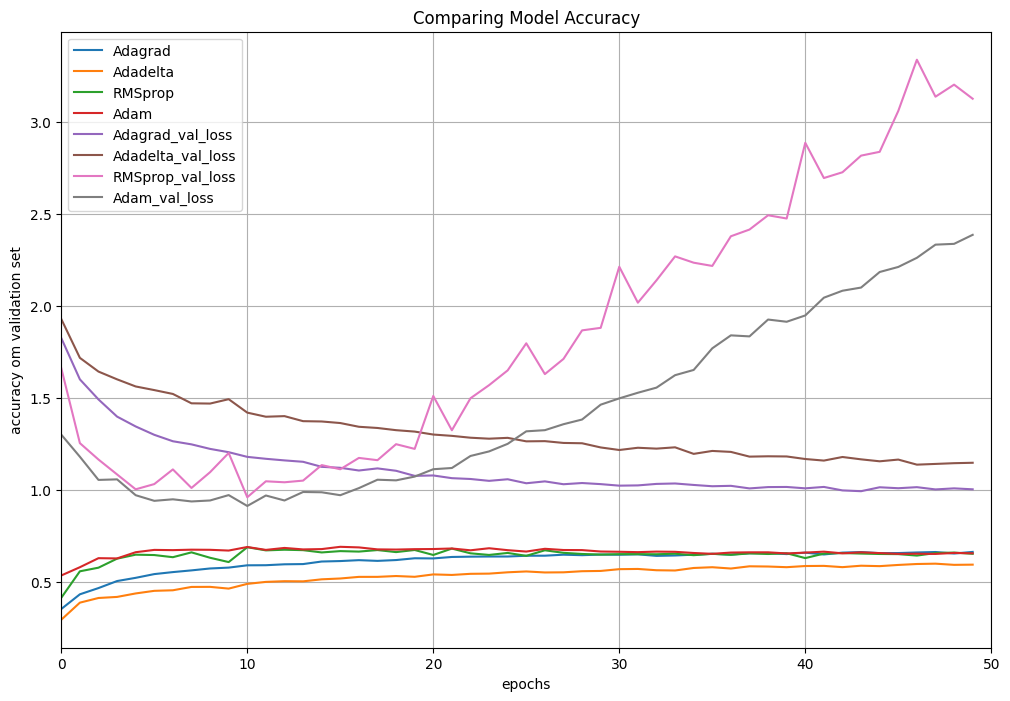

In [22]:
fig = plt.figure(figsize=(12,8))

plt.plot(range(epochs),history5.history['val_accuracy'],label='Adagrad')
plt.plot(range(epochs),history6.history['val_accuracy'],label='Adadelta')
plt.plot(range(epochs),history7.history['val_accuracy'],label='RMSprop')
plt.plot(range(epochs),history8.history['val_accuracy'],label='Adam')
plt.plot(range(epochs),history5.history['val_loss'],label='Adagrad_val_loss')
plt.plot(range(epochs),history6.history['val_loss'],label='Adadelta_val_loss')
plt.plot(range(epochs),history7.history['val_loss'],label='RMSprop_val_loss')
plt.plot(range(epochs),history8.history['val_loss'],label='Adam_val_loss')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('accuracy om validation set')
plt.grid(True)
plt.title("Comparing Model Accuracy")
plt.show()
# fig.savefig('img/compare-accuracy.jpg')
# plt.close(fig)

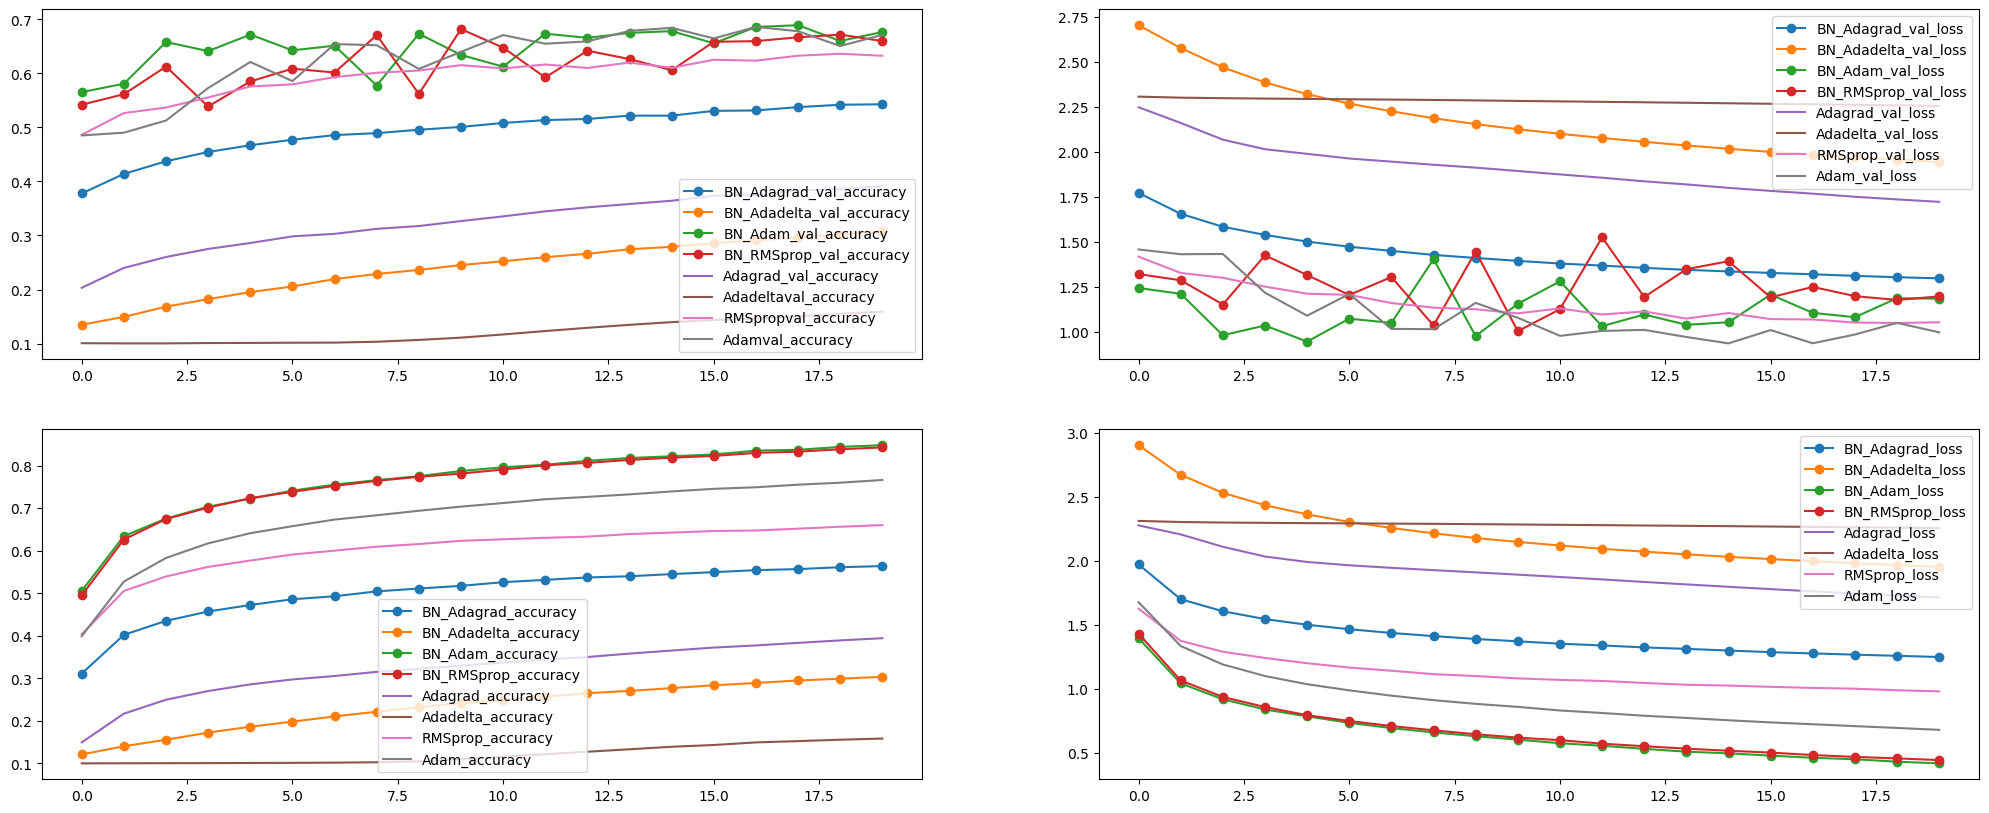

In [95]:
fig, axs = plt.subplots(2,2,figsize=(25,10)) 
# summarize history for accuracy
axs[0,0].plot(range(epochs),history1.history['val_accuracy'],label='BN_Adagrad_val_accuracy',marker= 'o')
axs[0,0].plot(range(epochs),history2.history['val_accuracy'],label='BN_Adadelta_val_accuracy',marker= 'o')
axs[0,0].plot(range(epochs),history3.history['val_accuracy'],label='BN_Adam_val_accuracy',marker= 'o')
axs[0,0].plot(range(epochs),history4.history['val_accuracy'],label='BN_RMSprop_val_accuracy',marker= 'o')
axs[0,0].plot(range(epochs),history5.history['val_accuracy'],label='Adagrad_val_accuracy')
axs[0,0].plot(range(epochs),history6.history['val_accuracy'],label='Adadeltaval_accuracy')
axs[0,0].plot(range(epochs),history8.history['val_accuracy'],label='RMSpropval_accuracy')
axs[0,0].plot(range(epochs),history7.history['val_accuracy'],label='Adamval_accuracy')


axs[0,1].plot(range(epochs),history1.history['val_loss'],label='BN_Adagrad_val_loss',marker= 'o')
axs[0,1].plot(range(epochs),history2.history['val_loss'],label='BN_Adadelta_val_loss',marker= 'o')
axs[0,1].plot(range(epochs),history3.history['val_loss'],label='BN_Adam_val_loss',marker= 'o')
axs[0,1].plot(range(epochs),history4.history['val_loss'],label='BN_RMSprop_val_loss',marker= 'o')
axs[0,1].plot(range(epochs),history5.history['val_loss'],label='Adagrad_val_loss')
axs[0,1].plot(range(epochs),history6.history['val_loss'],label='Adadelta_val_loss')
axs[0,1].plot(range(epochs),history8.history['val_loss'],label='RMSprop_val_loss')
axs[0,1].plot(range(epochs),history7.history['val_loss'],label='Adam_val_loss')

axs[1,0].plot(range(epochs),history1.history['accuracy'],label='BN_Adagrad_accuracy',marker= 'o')
axs[1,0].plot(range(epochs),history2.history['accuracy'],label='BN_Adadelta_accuracy',marker= 'o')
axs[1,0].plot(range(epochs),history3.history['accuracy'],label='BN_Adam_accuracy',marker= 'o')
axs[1,0].plot(range(epochs),history4.history['accuracy'],label='BN_RMSprop_accuracy',marker= 'o')
axs[1,0].plot(range(epochs),history5.history['accuracy'],label='Adagrad_accuracy')
axs[1,0].plot(range(epochs),history6.history['accuracy'],label='Adadelta_accuracy')
axs[1,0].plot(range(epochs),history8.history['accuracy'],label='RMSprop_accuracy')
axs[1,0].plot(range(epochs),history7.history['accuracy'],label='Adam_accuracy')

axs[1,1].plot(range(epochs),history1.history['loss'],label='BN_Adagrad_loss',marker= 'o')
axs[1,1].plot(range(epochs),history2.history['loss'],label='BN_Adadelta_loss',marker= 'o')
axs[1,1].plot(range(epochs),history3.history['loss'],label='BN_Adam_loss',marker= 'o')
axs[1,1].plot(range(epochs),history4.history['loss'],label='BN_RMSprop_loss',marker= 'o')
axs[1,1].plot(range(epochs),history5.history['loss'],label='Adagrad_loss')
axs[1,1].plot(range(epochs),history6.history['loss'],label='Adadelta_loss')
axs[1,1].plot(range(epochs),history8.history['loss'],label='RMSprop_loss')
axs[1,1].plot(range(epochs),history7.history['loss'],label='Adam_loss')





axs[0,0].legend(loc=0)
axs[1,0].legend(loc=0)
axs[0,1].legend(loc=0)
axs[1,1].legend(loc=0)

# axs[0].set_title('Model Accuracy')
# axs[0].set_ylabel('Accuracy') 
# axs[0].set_xlabel('Epoch')
# axs[0].legend(['train', 'validate'], loc='upper left')
# # summarize history for loss
# axs[1].plot(history.history['loss']) 
# axs[1].plot(history.history['val_loss']) 
# axs[1].set_title('Model Loss')
# axs[1].set_ylabel('Loss') 
# axs[1].set_xlabel('Epoch')
# axs[1].legend(['train', 'validate'], loc='upper left')
plt.show()

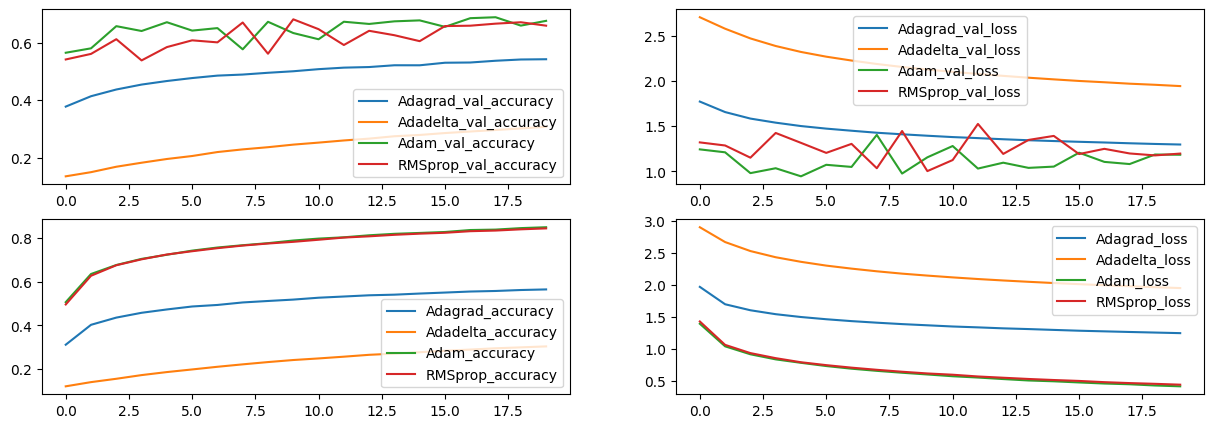

In [88]:
fig, axs = plt.subplots(2,2,figsize=(15,5)) 
# summarize history for accuracy
axs[0,0].plot(range(epochs),history1.history['val_accuracy'],label='Adagrad_val_accuracy')
axs[0,0].plot(range(epochs),history2.history['val_accuracy'],label='Adadelta_val_accuracy')
axs[0,0].plot(range(epochs),history3.history['val_accuracy'],label='Adam_val_accuracy')
axs[0,0].plot(range(epochs),history4.history['val_accuracy'],label='RMSprop_val_accuracy')
axs[0,1].plot(range(epochs),history1.history['val_loss'],label='Adagrad_val_loss')
axs[0,1].plot(range(epochs),history2.history['val_loss'],label='Adadelta_val_loss')
axs[0,1].plot(range(epochs),history3.history['val_loss'],label='Adam_val_loss')
axs[0,1].plot(range(epochs),history4.history['val_loss'],label='RMSprop_val_loss')
axs[1,0].plot(range(epochs),history1.history['accuracy'],label='Adagrad_accuracy')
axs[1,0].plot(range(epochs),history2.history['accuracy'],label='Adadelta_accuracy')
axs[1,0].plot(range(epochs),history3.history['accuracy'],label='Adam_accuracy')
axs[1,0].plot(range(epochs),history4.history['accuracy'],label='RMSprop_accuracy')
axs[1,1].plot(range(epochs),history1.history['loss'],label='Adagrad_loss')
axs[1,1].plot(range(epochs),history2.history['loss'],label='Adadelta_loss')
axs[1,1].plot(range(epochs),history3.history['loss'],label='Adam_loss')
axs[1,1].plot(range(epochs),history4.history['loss'],label='RMSprop_loss')
axs[0,0].legend(loc=0)
axs[1,0].legend(loc=0)
axs[0,1].legend(loc=0)
axs[1,1].legend(loc=0)